# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 14-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari
-----------------------------------

# <font color='blue'>PART 3: FEATURE REDUCTION USING PCA</font>

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [108]:
# Load clean telecom data file
master_df = pd.read_csv('E:\IIIT Bangalore AIML\Group Assignment 2\\telecom_churn_data_clean2.csv', low_memory=False)

In [109]:
master_df.head()

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,rech_days_left_data_7,rech_days_left_8,rech_days_left_data_8,churn,night_pck_churn_6,night_pck_churn_7,night_pck_churn_8,fb_churn_6,fb_churn_7,fb_churn_8
0,7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,...,0.00,5.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
1,7002311591,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,...,0.00,6.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
2,7000959346,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,...,0.00,3.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
3,7000104470,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,...,0.00,2.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
4,7000409785,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,...,0.00,1.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09


In [110]:
list(master_df)

['mobile_number',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'lo

In [111]:
master_df.shape

(28504, 144)

In [165]:
telecom = master_df.drop(['mobile_number'], 1)
telecom = telecom.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)
#telecom = telecom.drop(['fb_churn_6', 'fb_churn_7', 'fb_churn_8', 'night_pck_churn_6', 'night_pck_churn_7', 'night_pck_churn_8'], 1)


In [166]:
telecom.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,rech_days_left_data_7,rech_days_left_8,rech_days_left_data_8,churn,night_pck_churn_6,night_pck_churn_7,night_pck_churn_8,fb_churn_6,fb_churn_7,fb_churn_8
0,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0.00,5.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
1,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,10.69,...,0.00,6.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
2,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,0.00,...,0.00,3.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
3,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,0.00,...,0.00,2.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
4,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,613.84,...,0.00,1.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09


# applying SMOTE

# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X,y)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)


X_tr = X
y_tr = y

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr, train_size=0.7,random_state=42)

E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [168]:
from sklearn import preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
x_scaled = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

In [169]:
X_train

array([[-0.62777375, -0.60098282, -0.46519933, ..., -0.84595238,
        -0.4232551 , -0.08164746],
       [-0.48174232, -0.47902168,  0.61350149, ...,  1.10495341,
         0.11583577, -0.58357549],
       [-0.64347844, -0.60164784, -0.36403901, ..., -0.84595238,
        -0.96234597, -0.58357549],
       ...,
       [ 0.77843314,  0.63642298, -0.34771281, ..., -0.84595238,
        -0.78264902, -0.58357549],
       [-0.3310015 , -0.31335041,  0.50971177, ..., -0.11436271,
        -0.78264902, -0.45809349],
       [-0.65132068, -0.62530653, -0.64956833, ..., -0.84595238,
        -0.60295206, -0.33261148]])

In [170]:
X_test

array([[ 1.48485208e+00,  7.15652126e-01, -5.83202401e-01, ...,
         1.41140684e+00,  1.84219609e-01,  1.85976968e-01],
       [ 3.34741402e+00,  5.12838963e+00, -2.39859456e-01, ...,
        -8.45952377e-01, -9.62345973e-01, -5.83575495e-01],
       [-2.58400129e-01, -3.50893963e-01, -6.87809034e-02, ...,
        -3.58225930e-01, -6.38611890e-02, -5.83575495e-01],
       ...,
       [-3.56569632e-01, -2.88966239e-01,  3.33422215e-01, ...,
        -1.14362707e-01, -6.02952059e-01, -5.83575495e-01],
       [-4.71978477e-03, -2.41124906e-01,  4.90469314e-01, ...,
        -8.45952377e-01, -6.02952059e-01, -5.83575495e-01],
       [ 1.67574868e+00,  6.99744210e-01, -5.23396493e-01, ...,
         1.88175153e+00,  4.26438011e-02, -5.83575495e-01]])

# applying SVM kernel

from sklearn.svm import SVC
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)


# Printing classification report
print(classification_report(y_test, y_pred))

# applying decision tree

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

print(y_pred_default)
print(y_test)



# feature extraction using lasso

In [171]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X_train,y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_transformed = model.transform(X_train)
pos = model.get_support(indices=True)
 
print(X_train_transformed.shape)
print(pos)
 
X_test_transformed = model.transform(X_test)
print(X_test_transformed.shape) 


(26342, 63)
[ 0  1  3  4  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 24 25 27 28 29
 30 31 32 33 34 36 37 38 39 41 42 43 44 45 46 47 48 49 51 52 53 54 55 56
 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72]
(11290, 63)


In [172]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = X_train_transformed  #telecom.drop(['churn'],axis=1)
y = y_train  #telecom['churn']
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X,y)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)


(26424, 63)
(26424,)


13212

# applying linear SVC after lasso (Need to be removed)

model = SVC(C = 1)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
confusion_matrix(y_true=y_test, y_pred=y_pred)

# applying decision tree after lasso

In [184]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test_transformed)

# Printing classification report
print(classification_report(y_test, y_pred_default))

print(y_pred_default)
print(y_test)


             precision    recall  f1-score   support

          0       0.89      0.88      0.89      5604
          1       0.88      0.89      0.89      5686

avg / total       0.89      0.89      0.89     11290

[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]


In [188]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

[[4943  661]
 [ 622 5064]]


In [189]:
print(accuracy_score(y_test,y_pred_default))

0.8863596102745793


# applying default random forest after lasso

In [173]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [174]:
# fit
#rfc.fit(X_train_transformed,y_train)
rfc.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [175]:
# Making predictions
predictions = rfc.predict(X_test_transformed)

In [176]:
# Let's check the report of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      5604
          1       0.97      0.96      0.96      5686

avg / total       0.96      0.96      0.96     11290



In [177]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[5408  196]
 [ 207 5479]]


In [178]:
print(accuracy_score(y_test,predictions))

0.9643046944198406


# applying PCA and Logistic regression after lasso

In [179]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [180]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([11.3 , 21.19, 27.49, 33.15, 36.99, 40.67, 44.17, 47.01, 49.62,
       52.2 , 54.43, 56.51, 58.57, 60.49, 62.3 , 64.09, 65.82, 67.51,
       69.17, 70.72, 72.25, 73.75, 75.22, 76.62, 78.02, 79.32, 80.53,
       81.71, 82.87, 83.97, 85.02, 86.05, 87.07, 87.99, 88.84, 89.65,
       90.41, 91.17, 91.9 , 92.56, 93.16, 93.75, 94.33, 94.84, 95.34,
       95.83, 96.28, 96.71, 97.13, 97.53, 97.88, 98.22, 98.54, 98.82,
       99.05, 99.26, 99.41, 99.55, 99.69, 99.82, 99.9 , 99.97, 99.99])

In [181]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test_transformed)
print(df_test_pca.shape)

(26424, 63)
(11290, 63)


In [201]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(df_train_pca, y_tr)

#predict()
# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [202]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[4624  980]
 [ 793 4893]]


In [204]:
print(accuracy_score(y_test,y_pred))

0.8429583702391497


In [205]:
r_squared = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(mse)

print(r_squared)

0.15704162976085032
0.3718003421002486


In [61]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [62]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.48,0.02,1.00,1.00,2,{'max_depth': 2},4,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.05,0.00,0.00,0.00
1,0.67,0.02,1.00,1.00,7,{'max_depth': 7},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.07,0.01,0.00,0.00
2,0.63,0.02,1.00,1.00,12,{'max_depth': 12},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.10,0.00,0.00,0.00
3,0.67,0.02,1.00,1.00,17,{'max_depth': 17},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.03,0.00,0.00,0.00


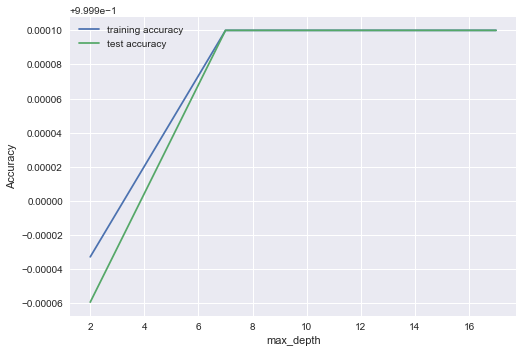

In [63]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [64]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [65]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.16,0.11,1.00,1.00,100,{'n_estimators': 100},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.28,0.00,0.00,0.00
1,20.62,0.31,1.00,1.00,500,{'n_estimators': 500},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,5.67,0.09,0.00,0.00
2,29.97,0.47,1.00,1.00,900,{'n_estimators': 900},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.66,0.01,0.00,0.00
3,43.40,0.70,1.00,1.00,1300,{'n_estimators': 1300},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.52,0.04,0.00,0.00


In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_transformed, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train_transformed,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test_transformed)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

# applying decision tree

In [21]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_transformed, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
y_pred_default = dt_default.predict(X_test_transformed)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8128
          1       0.59      0.26      0.36       531

avg / total       0.93      0.94      0.93      8659

